In [31]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('poster')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [5]:
def plot_pmf(xs, probs, rv_name='X'):
    plt.plot(xs, probs, 'ro', ms=12, mec='b', color='b')
    plt.vlines(xs, 0, probs, colors='b', lw=4)
    plt.xlabel('$x$')
    plt.ylabel('$P(X = x)$')
    plt.ylim(0, 1)
    plt.title('PMF of $X$');

Text(0.5, 1.0, 'PMF of X when p = 0.3')

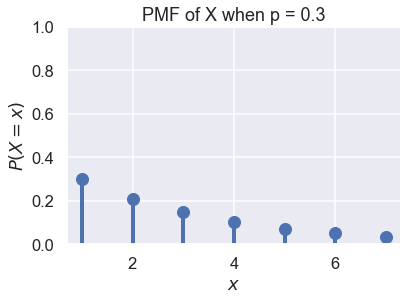

In [16]:
import scipy.stats as stats

xs = np.arange(1, 8)
y1 = stats.geom.pmf(xs, p = 0.3)
y2 = stats.geom.pmf(xs, p = 0.8)

plot_pmf(xs, y1)
plt.title('PMF of X when p = 0.3')

Text(0.5, 1.0, 'PMF of X when p = 0.8')

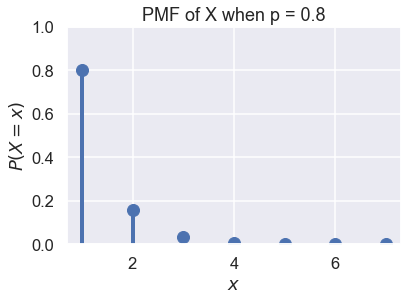

In [17]:
plot_pmf(xs, y2)
plt.title('PMF of X when p = 0.8')

Text(0.5, 1.0, 'PMF of X ~ Binom(8, 0.5)')

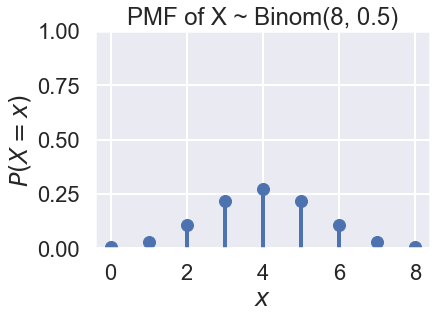

In [32]:
n = 8
p = 0.5
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})')

Text(0.5, 1.0, 'PMF of X ~ Binom(24, 0.5)')

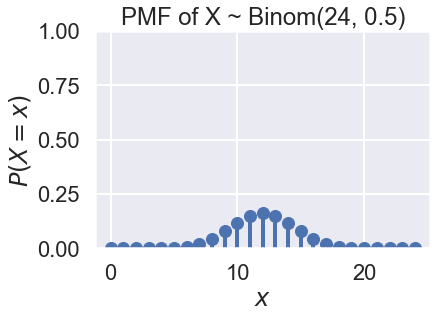

In [34]:
n = 24
p = 0.5
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})')

Text(0.5, 1.0, 'PMF of X ~ Binom(8, 0.2)')

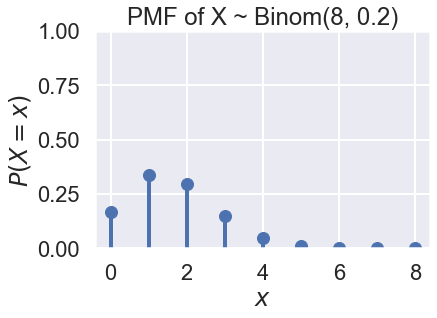

In [33]:
n = 8
p = 0.2
xs = np.arange(0, n + 1)
ys = stats.binom.pmf(xs, n, p)

plot_pmf(xs, ys)
plt.title(f'PMF of X ~ Binom({n}, {p})')

In [21]:
stats.binom.pmf(3, 5, 1/3)

0.16460905349794233

In [22]:
5 * 2 * (1/3)**3 * (2/3)**2

0.16460905349794233

In [44]:
def p(x, theta):
    return 3 * x**2 # / theta**3

th = 4
xs = np.arange(0, th + 1)
ys = p(xs, th)
ys

array([ 0,  3, 12, 27, 48])

In [46]:
sum(ys)

90

In [47]:
def p(x, theta):
    return 3 * x**2 # / theta**3

th = 8
xs = np.arange(0, th + 1)
ys = p(xs, th)
ys

array([  0,   3,  12,  27,  48,  75, 108, 147, 192])

In [48]:
sum(ys)

612